In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## Доверительный интервал для $\bar{X}$ : $ \Biggl(\LARGE \frac{2 \bar{X}}{1 + 2 \sqrt{\frac{1}{12n(1 - \alpha)}}}; \frac{2 \bar{X}}{1 - 2 \sqrt{\frac{1}{12n(1 - \alpha)}}} \Biggr) $

### Для ${X}_{(1)} : \Biggl (\LARGE{X}_{(1)}, \frac{{X}_{(1)}}{1 - \sqrt[n]{\alpha}} \Biggr)$ 

### Для $ {X}_{(n)} : \Biggl(\LARGE{X}_{(n)}; \frac{{X}_{(n)}}{\sqrt[n]{1 - \alpha}} \Biggr) $

In [9]:
theta = 1
alpha = 0.95
N = 100
uniform_rv = sts.uniform(0, theta)
X = uniform_rv.rvs(N)

In [10]:
# For x average
av_est_left = np.array([ (2*X[:n].mean()) / (1. + 2*math.sqrt(1./(12*n*(1-alpha)))) for n in range(1, N+1)])
av_est_right = np.array([ (2*X[:n].mean()) / (1. - 2*math.sqrt(1./(12*n*(1-alpha)))) for n in range(1, N+1)])

In [11]:
# For x(1)
est_1_left = np.array([X[:n].min() for n in range (1, N+1)])
est_1_right = np.array([X[:n].min() / (1 - alpha**(1./n)) for n in range (1, N+1)])

In [12]:
# for x(n)
est_n_left = np.array([X[:n].max() for n in range (1, N+1)])
est_n_right =  np.array([X[:n].max() / ((1 - alpha)**(1./n)) for n in range (1, N+1)])

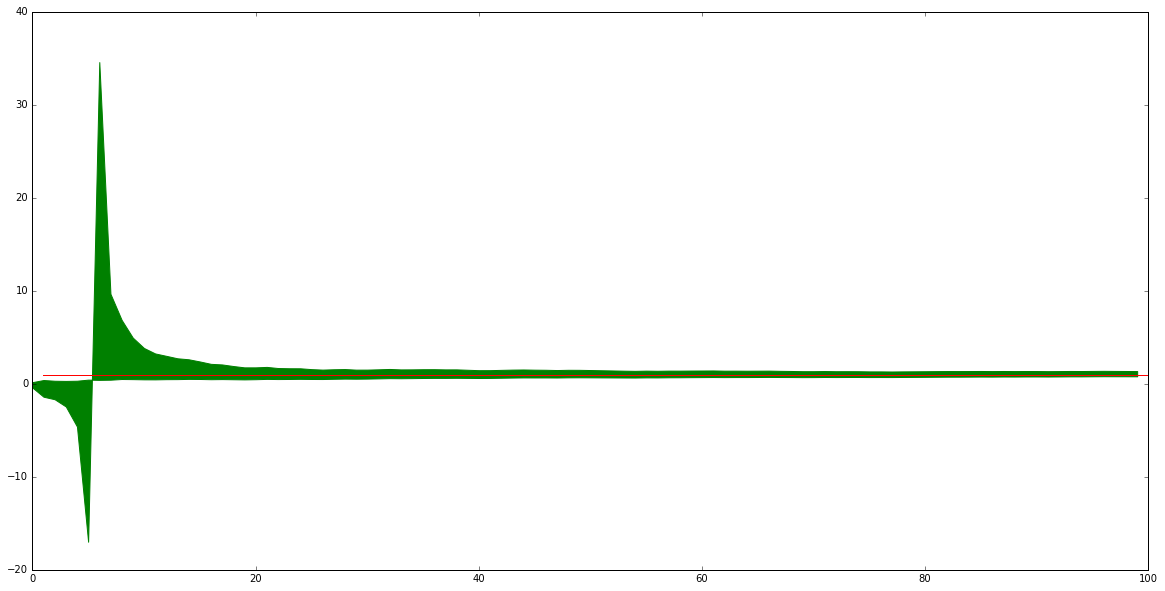

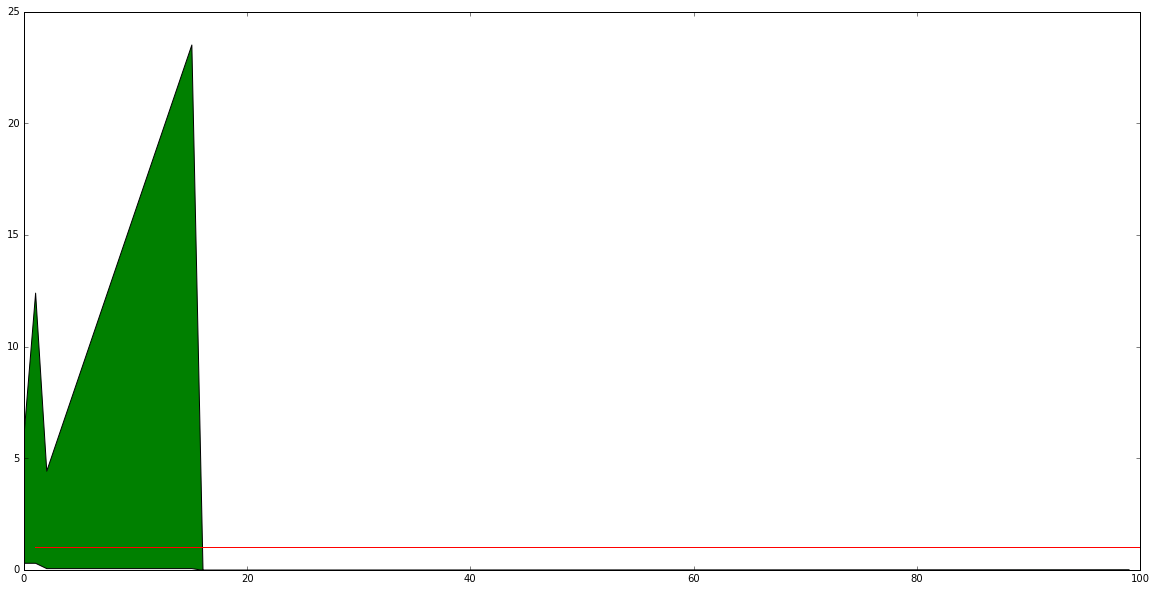

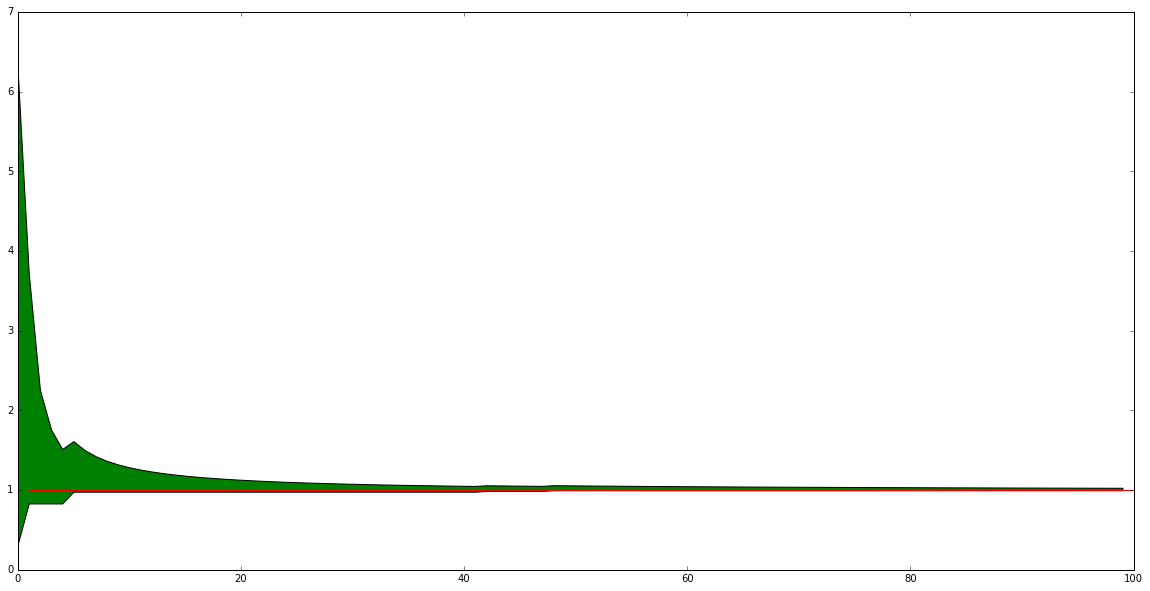

In [13]:
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), av_est_left, av_est_right, color = "green")
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), est_1_left, est_1_right, facecolor='green')
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), est_n_left, est_n_right, facecolor='green')
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()

###  Если мы используем выборочное среднее и максимум, то получаем хорошие доверительные интервалы. Для минимума получается не очень хороший доверительный интервал. Вероятно, это связано с тем, что (n+1)X(1) - плохая оценка.

### Дальше - для распределения Коши

### $ \LARGE \theta : \Biggl( \hat{\mu} - U_{\frac{1 + \alpha}{2}} \frac{\frac{\pi}{2}}{\sqrt{n}}; \hat{\mu} + U_{\frac{1 + \alpha}{2}} \frac{\frac{\pi}{2}}{\sqrt{n}} \Biggr), где\ \LARGE \hat{\mu} -\ выборочная\ медиана.$

In [15]:
X = sts.cauchy.rvs(theta, 1, size=N)

### Квантиль уровня (1 + $\alpha$) / 2 :

In [16]:
x = np.arange(-10, 10, 0.01)
f = sts.norm(0,1).cdf(x)
quantile = 0
for i in range(2000):
    if (f[i] >= (1 + alpha) / 2) :
        quantile = i * 0.01 - 10
        break

In [17]:
est_left = np.array([np.partition(X[:n], n/2)[n/2] - quantile*math.pi/2./(math.sqrt(n)) for n in range(1,N+1) ])
est_right = np.array([np.partition(X[:n], n/2)[n/2] + quantile*math.pi/2./(math.sqrt(n)) for n in range(1,N+1) ])

/home/avk/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/home/avk/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


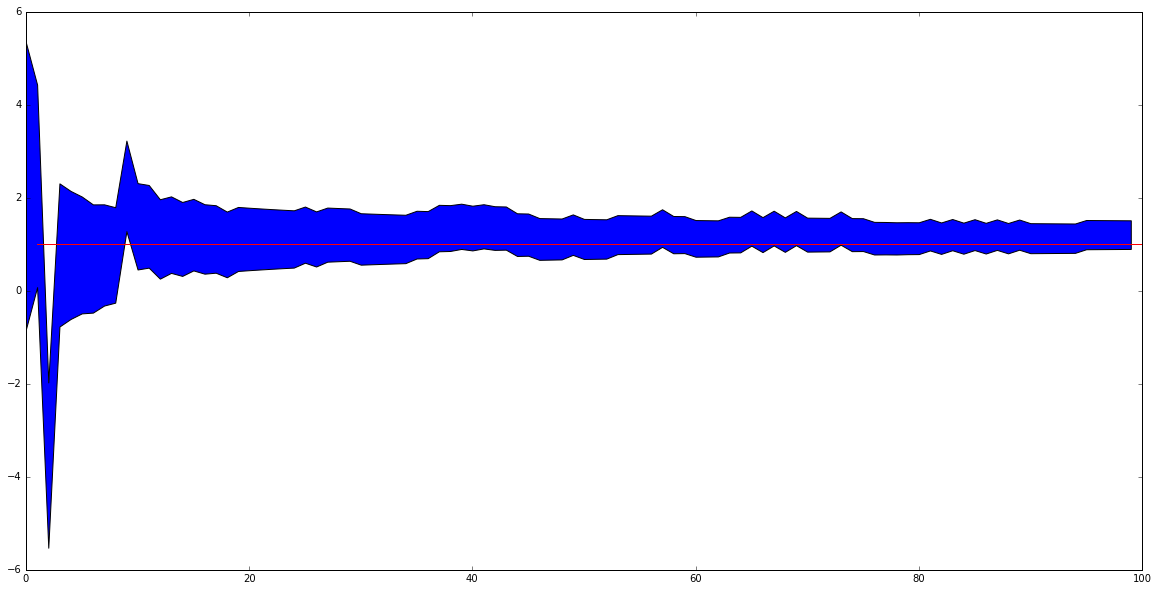

In [18]:
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), est_left, est_right)
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()

### Теперь для $\Large \theta :  \Biggl(\bar{X} - \frac{ U_{\frac{1 - \alpha}{2}} \bar{X}}{\sqrt{n}} ; \bar{X} + \frac{ U_{\frac{1 + \alpha}{2}} \bar{X}}{\sqrt{n}} \Biggr) $ , Х распределенны по Пуассоновскому закону с параметром $\theta$

In [19]:
pois_rv = sts.poisson(theta)
X = pois_rv.rvs(N)
est_left = np.array([X[:n].mean()*(1 - (quantile)/(math.sqrt(n))) for n in range(1,N+1)])
est_right = np.array([X[:n].mean()*(1 + (quantile)/(math.sqrt(n))) for n in range(1,N+1)])

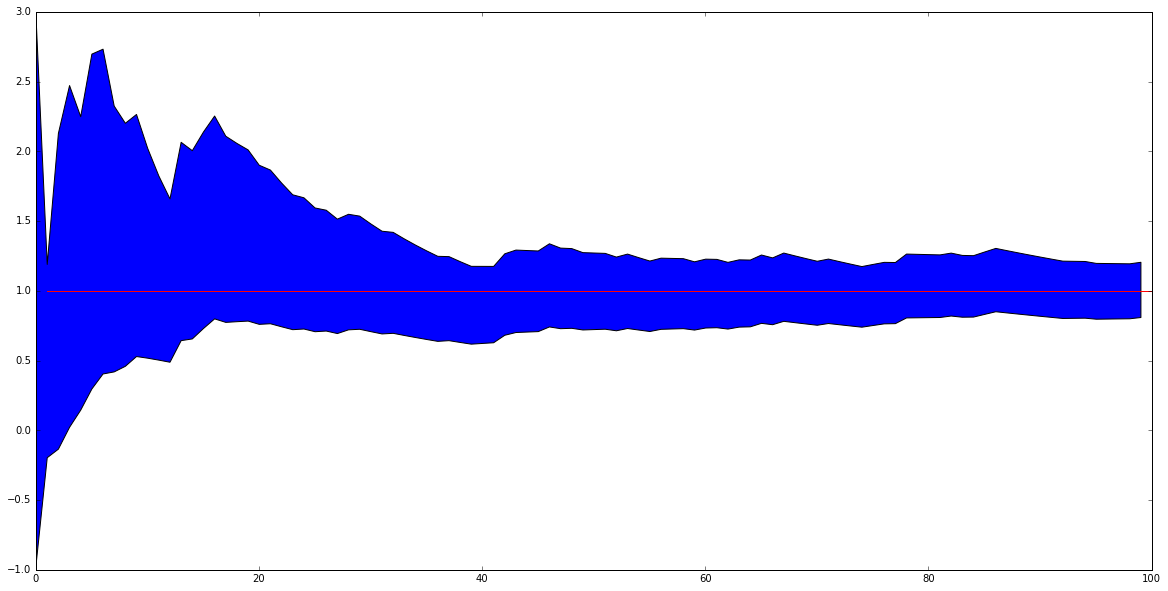

In [20]:
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), est_left, est_right)
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()

### Доверительный интервал получился не такой уж и плохой

### Теперь для таких : $X_1, ... X_n \sim \Gamma(\theta, \lambda) $

$ \Large \theta : \Biggl ( \frac{\lambda}{\bar{X}} - \frac{U_{\frac{1 - \alpha}{2}} {\Bigl(\frac{\lambda}{\bar{X}}} \Bigl) ^{3}}{\sqrt{n}} ; \frac{\lambda}{\bar{X}} + \frac{U_{\frac{1 + \alpha}{2}} {\Bigl(\frac{\lambda}{\bar{X}}} \Bigl) ^{3}}{\sqrt{n}} \Biggr) $

In [23]:
lambda_ = 10
gamma_rv = sts.gamma(lambda_, theta)
X = gamma_rv.rvs(N)
est_left = np.array([lambda_/X[:n].mean() - (quantile*(lambda_/X[:n].mean())**3)/(math.sqrt(n)) for n in range(1,N+1)])
est_right = np.array([lambda_/X[:n].mean() + (quantile*(lambda_/X[:n].mean())**3)/(math.sqrt(n)) for n in range(1,N+1)])

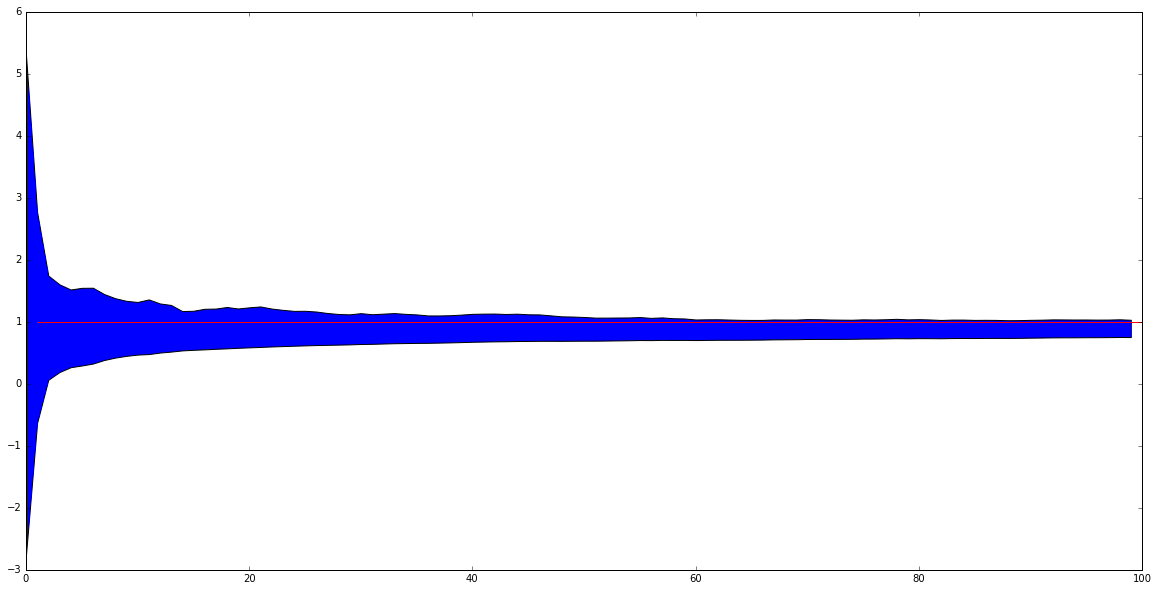

In [24]:
plt.figure(figsize=(20,10))
plt.matplotlib.pyplot.fill_between(np.arange(N), est_left, est_right)
plt.plot(np.arange(1,N+1), np.ones((1, N))[0], color="red")
plt.show()

### А этот по "качеству" вышел почти такой же как предыдущий)